# Local Outlier factors implementation

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\mdaza\AppData\Local\Temp\ipykernel_21452\781345070.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
from sklearn.datasets import make_moons


X, y = make_moons(n_samples=300, noise=0.1)

In [7]:
X, y 

(array([[-7.48272771e-01,  7.52015859e-01],
        [ 6.24915369e-01,  8.61230509e-01],
        [-6.71854136e-02,  1.10517597e+00],
        [ 1.08908349e+00,  4.19683482e-02],
        [ 1.90038910e+00,  3.18347571e-01],
        [ 1.49555897e+00, -3.09183196e-01],
        [-7.54759023e-01,  5.40235315e-01],
        [-8.90032878e-01,  6.64993693e-01],
        [-9.11236666e-01,  6.96577005e-01],
        [ 1.87982846e-01,  2.20092675e-02],
        [ 9.97654151e-01,  3.36971687e-02],
        [ 1.03720789e+00, -9.57740804e-02],
        [-6.28496897e-01,  8.00102792e-01],
        [-1.01855478e+00,  2.52582217e-01],
        [ 1.06535184e-01,  1.25342640e-01],
        [-9.00544015e-01,  4.98151963e-01],
        [ 1.87597552e+00,  2.26860391e-01],
        [ 4.34882296e-01,  8.14894441e-01],
        [ 1.16439826e+00, -5.31254335e-01],
        [ 1.61103048e+00, -3.83962076e-01],
        [ 1.41909130e-01,  4.56145416e-01],
        [-4.12876034e-01,  7.10905817e-01],
        [ 8.83632794e-01, -4.471

In [6]:
X_outliers = np.random.uniform(low=-3, high=3, size=(20, 2))
X = np.vstack((X, X_outliers))

In [9]:
from sklearn.neighbors import LocalOutlierFactor

In [8]:
out = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = out.fit_predict(X)

In [10]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

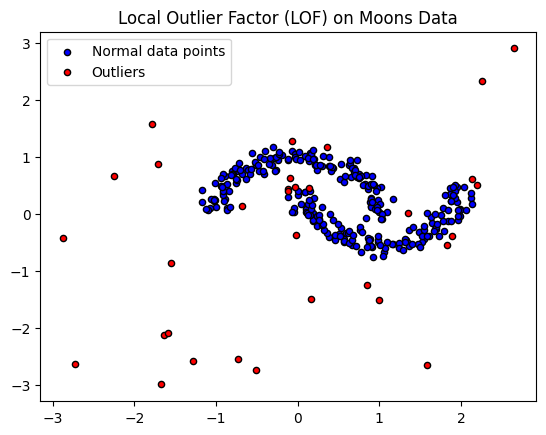

In [12]:
# Separate normal data points>>inliers and outliers 
X_inliers = X[y_pred == 1]
X_outliers = X[y_pred == -1]

# Plotting
plt.title("Local Outlier Factor (LOF) on Moons Data")
plt.scatter(X_inliers[:, 0], X_inliers[:, 1], color='b', s=20, edgecolor='k', label='Normal data points')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='r', s=20, edgecolor='k', label='Outliers')
plt.legend()
plt.show()